In [2]:
import pandas as pd

df=pd.read_csv('bakery_result.csv')
cluster=pd.read_csv('../project/cluster.csv')
df.set_index('sigungu',inplace=True)
df

,Unnamed: 0,뚜레쥬르,파바,sum,pop,sido,rate,hp_bin,sig_cd
sigungu,,,,,,,,,
강원도 고성군,0,0,2,2,26791.5,강원도,0.746505,0~4개,NaN
강원도 삼척시,1,1,3,4,65623.0,강원도,0.609542,0~4개,NaN
강원도 양구군,2,1,1,2,22379.0,강원도,0.893695,0~4개,NaN
강원도 양양군,3,1,1,2,27627.5,강원도,0.723916,0~4개,NaN
강원도 영월군,4,2,2,4,38345.0,강원도,1.043161,0~4개,NaN
...,...,...,...,...,...,...,...,...,...
충청북도 단양군,84,1,2,3,29143.0,충청북도,1.029407,0~4개,NaN
충청북도 보은군,85,1,1,2,32402.5,충청북도,0.617236,0~4개,NaN
충청북도 영동군,86,1,2,3,47736.5,충청북도,0.628450,0~4개,NaN


In [3]:
cluster.set_index('sigungu',inplace=True)
cluster

,cluster
sigungu,
강원도 고성군,0
강원도 철원군,0
강원도 화천군,0
경기도 연천군,0
경상남도 거창군,0
...,...
전라북도 장수군,2
전라북도 진안군,2
충청남도 청양군,2


In [4]:
df['cluster']=cluster['cluster']
df.reset_index(inplace=True)

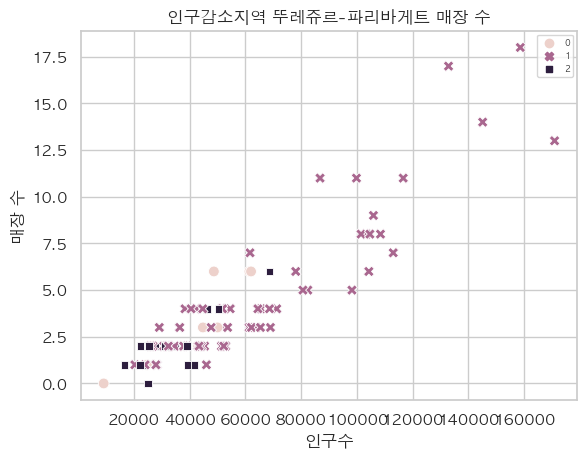

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='pop', y='sum', hue='cluster',style='cluster',s=60,data=df)
for i in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[i] # 한 행씩 꺼내기
    name = row['sigungu'] # 이름이 저장된 열
    x = row['pop'] # x좌표가 저장된 열
    y = row['sum'] # y좌표가 저장된 열
#    plt.text(x, y, name, fontsize=6)

plt.title('인구감소지역 뚜레쥬르-파리바게트 매장 수')
plt.xlabel('인구수')
plt.ylabel('매장 수')
plt.legend(fontsize=6)
plt.savefig('output/bakery_cluster.png', bbox_inches='tight')
plt.show()